# cygnus-equalprefetch
10/3/2023


Compare Cygnus and Pythia at fixed degrees, with few/no optimizations enabled.
- Pythia
- Cygnus-Depth
- Cygnus-Width
- *Degrees*: 1, 2, 4
- *Binary*: `default` with **ChampSim DRAM model** at 3200 MT/s

In [1]:
import copy
from collections import defaultdict
from importlib import reload
import os
import sys

from matplotlib import colormaps
import pandas as pd

sys.path.append(os.path.abspath("../../"))
from plot_utils import collate, plot

# Configuration

In [2]:
sim_dir = "/u/cmolder/GitHub/ChampSim/sim/dram_champsim/default_3200/"
baseline_study = "baseline"
baseline_experiment = "_baseline"
weights_path = "/u/cmolder/GitHub/ChampSim/external/naboo/conf/weights.toml"

suites = [
    "spec06",
    "spec17",
    "cloudsuite",
    "gap",
    "gap_real"
]
stats  = [
    "cpu.gmean.ipc_improvement",
]
dpi = 150

In [3]:
reload(collate)
studies = {
    "baseline": collate.StudyCollator(sim_dir, "baseline",
                                      baseline_study=baseline_study,
                                      baseline_experiment=baseline_experiment,
                                      weights_path=weights_path),
    "prefetchers_equal": collate.StudyCollator(sim_dir, "prefetchers_equal", 
                                               baseline_study=baseline_study, 
                                               baseline_experiment=baseline_experiment,
                                               weights_path=weights_path),
    "prefetchers": collate.StudyCollator(sim_dir, "prefetchers",
                                         baseline_study=baseline_study,
                                         baseline_experiment=baseline_experiment,
                                         weights_path=weights_path),
}

[ipykernel_launcher][angrist-3] Reading study files: 100%|██████████| 218/218 [00:02<00:00, 86.18file/s] 


[ipykernel_launcher][angrist-3] Generating benchmark stats for 80 benchmarks over 1 experiments:
    Benchmarks : cc__belgium_osm.mtx sssp pr__coPapersCiteseer.mtx bfs__dblp-2010.mtx pr__coAuthorsCiteseer.mtx merced 649.fotonik3d soplex astar bwaves streaming delta cc bfs__netherlands_osm.mtx bc__amazon-2008.mtx bc__belgium_osm.mtx bc__coAuthorsCiteseer.mtx bc__dblp-2010.mtx libquantum cc__com-Youtube.mtx cc__amazon0601.mtx 619.lbm bc__com-Youtube.mtx GemsFDTD bfs omnetpp cassandra bc__sx-stackoverflow.mtx bfs__amazon-2008.mtx nutch cc__netherlands_osm.mtx 628.pop2 bc__netherlands_osm.mtx bfs__belgium_osm.mtx gcc bfs__in-2004.mtx whiskey mcf leslie3d tc bfs__coAuthorsCiteseer.mtx cc__sx-stackoverflow.mtx sphinx3 cactusADM 623.xalancbmk pr__netherlands_osm.mtx bc__soc-LiveJournal1.mtx bc__coPapersCiteseer.mtx 607.cactuBSSN pr__luxembourg_osm.mtx bc__wikipedia-20060925.mtx pr__dblp-2010.mtx charlie zeusmp cc__coPapersCiteseer.mtx pr cc__amazon-2008.mtx pr__com-Youtube.mtx bfs__com-Youtub

[ipykernel_launcher][angrist-3] Generating benchmark stats: 100%|██████████| 80/80 [00:01<00:00, 53.55it/s] 

[ipykernel_launcher][angrist-3] Generating suite stats for 7 suites over 1 experiments:
    Suites     : spec17 gap_real all spec06 google gap cloudsuite
    Experiments: _baseline
        



[ipykernel_launcher][angrist-3] Generating suite stats: 100%|██████████| 7/7 [00:01<00:00,  4.99it/s]
[ipykernel_launcher][angrist-3] Reading study files:   1%|          | 11/1972 [00:01<03:00, 10.89file/s]


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

# "Equal" prefetchers

In [4]:
equal_prefetchers_df = {
    'Cygnus Width-1': studies['prefetchers_equal']['cygnus__deg1'],
    'Cygnus Width-2': studies['prefetchers_equal']['cygnus__deg2'],
    'Cygnus Width-4': studies['prefetchers_equal']['cygnus__deg4'],
    'Cygnus Width-dyn+opt': studies['prefetchers']['cygnus'],
    
    'Cygnus Depth-1': studies['prefetchers_equal']['cygnus_depth__deg1'],
    'Cygnus Depth-2': studies['prefetchers_equal']['cygnus_depth__deg2'],
    'Cygnus Depth-4': studies['prefetchers_equal']['cygnus_depth__deg4'],
    'Cygnus Depth-dyn+opt': studies['prefetchers']['cygnus_depth'],

    'Pythia Depth-1': studies['prefetchers_equal']['pythia__deg1'],
    'Pythia Depth-2': studies['prefetchers_equal']['pythia__deg2'],
    'Pythia Depth-4': studies['prefetchers_equal']['pythia__deg4'],
    'Pythia Depth-dyn+opt': studies['prefetchers']['pythia'],
}
equal_prefetchers_colors = defaultdict(lambda: None, {
    'Cygnus Width-1': colormaps['Set3'](0),
    'Cygnus Width-2': colormaps['Set3'](0),
    'Cygnus Width-4': colormaps['Set3'](0),
    'Cygnus Width-dyn+opt': colormaps['Set3'](0),

    'Cygnus Depth-1': colormaps['Set3'](1),
    'Cygnus Depth-2': colormaps['Set3'](1),
    'Cygnus Depth-4': colormaps['Set3'](1),
    'Cygnus Depth-dyn+opt': colormaps['Set3'](1),

    'Pythia Depth-1': colormaps['Set3'](2),
    'Pythia Depth-2': colormaps['Set3'](2),
    'Pythia Depth-4': colormaps['Set3'](2),
    'Pythia Depth-dyn+opt': colormaps['Set3'](2),
})
equal_prefetchers_hatches = defaultdict(lambda: None, {
    'Cygnus Width-1': None,
    # 'Cygnus Width-2': '/',
    # 'Cygnus Width-4': '-',
    'Cygnus Width-dyn+opt': 'x',

    'Cygnus Depth-1': None,
    # 'Cygnus Depth-2': '/',
    # 'Cygnus Depth-4': '-',
    'Cygnus Depth-dyn+opt': 'x',

    'Pythia Depth-1': None,
    # 'Pythia Depth-2': '/',
    # 'Pythia Depth-4': '-',
    'Pythia Depth-dyn+opt': 'x',
})

equal_prefetchers_legend_kwargs = {
    'ncol': 3,
    'fontsize': 6.75,
    'loc': 'lower center',
    'bbox_to_anchor': (0.5, 1.0),
    'framealpha': 0,
}

equal_prefetchers_legend_kwargs_wide = {
    'ncol': 6,
    'fontsize': 6.75,
    'loc': 'lower center',
    'bbox_to_anchor': (0.5, 1.0),
    'framealpha': 0,
}

equal_prefetchers_label_kwargs = {
    'rotation': 0,
    'ha': 'center',
    'fontsize': 7,
}

## IPC improvement

In [5]:
reload(plot)
plot.get_suite_table(
    equal_prefetchers_df, "cpu.gmean.ipc_improvement",
    suites=suites, add_mean=True)

,spec06,spec17,cloudsuite,gap,gap_real,gmean
Cygnus Width-1,19.34,15.63,3.48,21.93,NaN,NaN
Cygnus Width-2,NaN,17.33,4.85,24.88,NaN,NaN
Cygnus Width-4,NaN,15.50,4.31,25.23,NaN,NaN
Cygnus Width-dyn+opt,20.94,16.40,5.23,27.12,NaN,NaN
Cygnus Depth-1,19.34,15.63,3.48,21.93,NaN,NaN
Cygnus Depth-2,19.81,15.67,4.11,23.92,NaN,NaN
Cygnus Depth-4,NaN,14.42,4.14,25.18,NaN,NaN
Cygnus Depth-dyn+opt,18.50,17.06,4.35,25.54,NaN,NaN
Pythia Depth-1,NaN,10.09,2.66,21.51,NaN,NaN
Pythia Depth-2,18.22,11.36,3.43,23.76,NaN,NaN


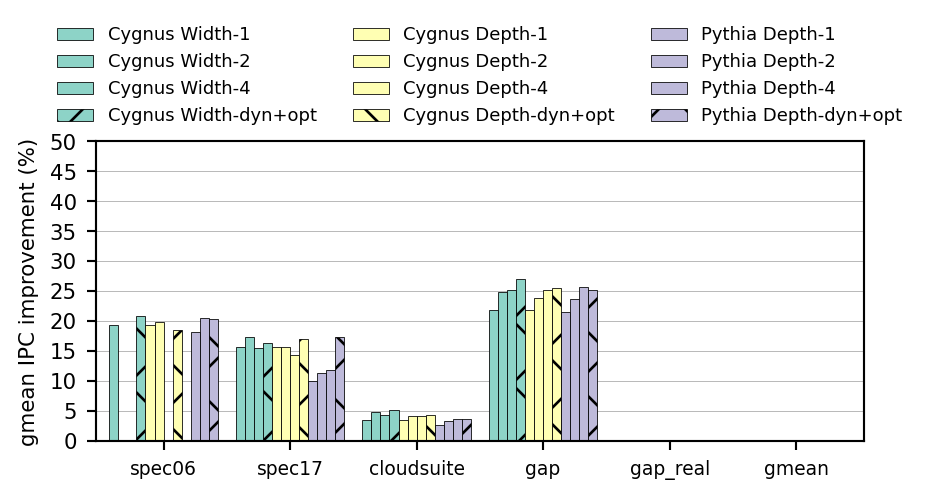

In [9]:
reload(plot)
plot.plot_suite_statistic(
    equal_prefetchers_df, "cpu.gmean.ipc_improvement",
    suites=suites,
    add_mean=True,
    colors=equal_prefetchers_colors,
    hatches=equal_prefetchers_hatches,
    legend_kwargs=equal_prefetchers_legend_kwargs,
    label_kwargs=equal_prefetchers_label_kwargs,
    add_suptitle=False,
    add_xlabel=False,
    ylabel='gmean IPC improvement (%)',
    ylim=(0, 50),
    ytick_distance=5,
    dpi=192, figsize=(5, 2.7))

### spec06

In [10]:
reload(plot)
plot.get_benchmark_table(
    equal_prefetchers_df, "spec06", "cpu.gmean.ipc_improvement",
    add_mean=True).T

,Cygnus Width-1,Cygnus Width-2,Cygnus Width-4,Cygnus Width-dyn+opt,Cygnus Depth-1,Cygnus Depth-2,Cygnus Depth-4,Cygnus Depth-dyn+opt,Pythia Depth-1,Pythia Depth-2,Pythia Depth-4,Pythia Depth-dyn+opt
GemsFDTD,39.550000,40.71,36.21,46.910000,39.550000,43.600000,44.47,34.120000,23.49,37.790000,46.770000,52.690000
astar,7.400000,9.47,8.58,6.790000,7.400000,7.470000,6.33,6.650000,7.64,7.690000,6.630000,6.690000
bwaves,34.300000,20.86,18.06,18.010000,34.300000,26.660000,22.79,26.350000,14.83,21.630000,26.900000,24.680000
cactusADM,66.680000,81.58,82.59,80.750000,66.680000,76.530000,80.05,69.430000,71.87,77.920000,80.500000,79.590000
gcc,9.760000,16.88,19.60,20.130000,9.760000,13.280000,16.94,12.070000,8.16,12.190000,16.120000,10.730000
lbm,18.020000,17.30,17.46,17.990000,18.020000,12.450000,13.55,-6.310000,15.89,11.710000,13.530000,11.690000
leslie3d,14.980000,NaN,NaN,17.450000,14.980000,16.660000,NaN,3.000000,NaN,14.230000,19.150000,19.720000
libquantum,41.060000,51.81,55.25,50.660000,41.060000,41.830000,42.73,75.730000,19.95,32.130000,42.560000,44.400000
mcf,10.660000,19.80,21.81,8.450000,10.660000,13.460000,14.42,9.320000,13.22,17.470000,17.990000,9.780000
milc,5.850000,-9.21,-28.69,0.330000,5.850000,-0.810000,-15.25,5.510000,3.49,2.100000,-4.540000,4.250000


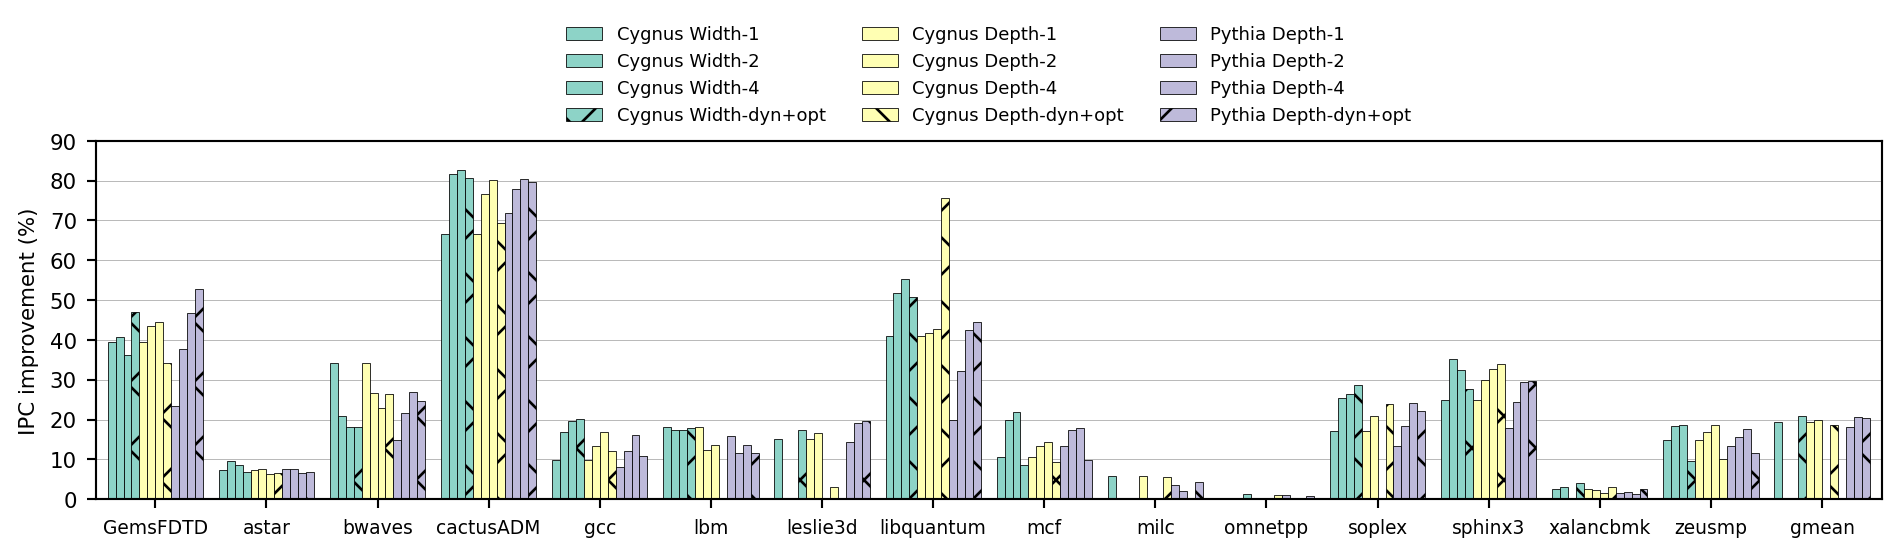

In [81]:
reload(plot)
plot.plot_benchmark_statistic(
    equal_prefetchers_df, "spec06", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=equal_prefetchers_colors,
    hatches=equal_prefetchers_hatches,
    legend_kwargs=equal_prefetchers_legend_kwargs,
    label_kwargs=equal_prefetchers_label_kwargs,
    add_suptitle=False,
    add_xlabel=False,
    ylabel='IPC improvement (%)',
    ylim=(0, 90),
    ytick_distance=10,
    dpi=192, figsize=(10, 3))
# import matplotlib.pyplot as plt
# plt.savefig('../../cvs/papers/micro-23r/figures/results_summary.pdf')

### gap

In [12]:
reload(plot)
plot.get_benchmark_table(
    equal_prefetchers_df, "gap", "cpu.gmean.ipc_improvement",
    add_mean=True).T

,Cygnus Width-1,Cygnus Width-2,Cygnus Width-4,Cygnus Width-dyn+opt,Cygnus Depth-1,Cygnus Depth-2,Cygnus Depth-4,Cygnus Depth-dyn+opt,Pythia Depth-1,Pythia Depth-2,Pythia Depth-4,Pythia Depth-dyn+opt
bc,9.880000,10.540000,8.040000,11.990000,9.880000,10.170000,9.100000,10.950000,9.720000,10.230000,9.350000,11.430000
bfs,46.290000,63.730000,74.130000,77.470000,46.290000,54.820000,64.730000,59.140000,41.900000,53.280000,64.350000,60.200000
cc,31.530000,33.310000,32.620000,34.960000,31.530000,32.930000,34.040000,36.260000,31.760000,31.720000,33.990000,33.770000
pr,18.990000,19.320000,18.510000,19.970000,18.990000,19.220000,18.710000,23.430000,19.200000,20.270000,21.740000,21.740000
sssp,6.400000,7.390000,8.020000,5.990000,6.400000,8.040000,9.060000,7.010000,6.130000,6.990000,7.550000,7.180000
tc,22.790000,22.670000,20.770000,23.760000,22.790000,23.980000,23.410000,23.190000,23.990000,25.450000,25.260000,23.600000
gmean,21.935136,24.878493,25.231689,27.127016,21.935136,23.917637,25.186021,25.540137,21.504439,23.756504,25.724379,25.198218


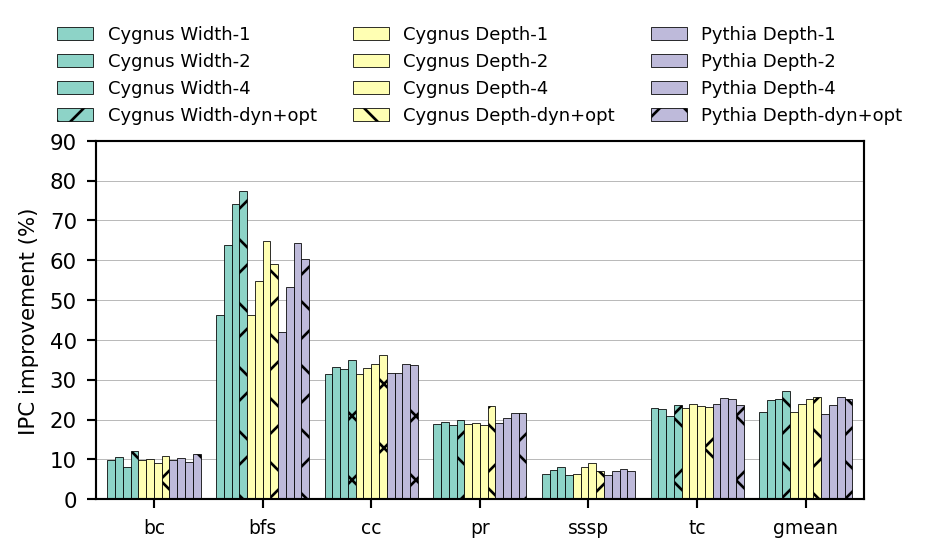

In [80]:
reload(plot)
plot.plot_benchmark_statistic(
    equal_prefetchers_df, "gap", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=equal_prefetchers_colors,
    hatches=equal_prefetchers_hatches,
    legend_kwargs=equal_prefetchers_legend_kwargs,
    label_kwargs=equal_prefetchers_label_kwargs,
    add_suptitle=False,
    add_xlabel=False,
    ylabel='IPC improvement (%)',
    ylim=(0, 90),
    ytick_distance=10,
    dpi=192, figsize=(5, 3))

### gap_real

In [14]:
reload(plot)
pd.set_option('display.max_rows', 500)
plot.get_benchmark_table(
    equal_prefetchers_df, "gap_real", "cpu.gmean.ipc_improvement",
    add_mean=True).T

,Cygnus Width-1,Cygnus Width-2,Cygnus Width-4,Cygnus Width-dyn+opt,Cygnus Depth-1,Cygnus Depth-2,Cygnus Depth-4,Cygnus Depth-dyn+opt,Pythia Depth-1,Pythia Depth-2,Pythia Depth-4,Pythia Depth-dyn+opt
bc__amazon-2008.mtx,4.67,3.62,-1.02,4.46,4.67,4.17,1.21,4.63,4.52,4.30,1.88,4.60
bc__amazon0601.mtx,1.70,-0.27,-5.46,1.94,1.70,0.07,-4.11,1.87,1.25,-0.14,-3.86,2.10
bc__belgium_osm.mtx,4.31,-13.79,-41.02,6.48,4.31,-13.44,-37.02,6.01,4.18,-11.10,-34.14,5.94
bc__coAuthorsCiteseer.mtx,5.61,3.47,-2.78,3.99,5.61,4.29,-0.14,5.39,5.51,4.42,0.44,5.39
bc__coPapersCiteseer.mtx,7.50,10.07,8.60,9.31,7.50,9.05,9.08,9.77,7.22,8.91,9.26,9.33
bc__com-Youtube.mtx,4.15,2.07,-3.82,4.55,4.15,2.38,-1.97,5.62,4.47,3.24,-0.94,5.81
bc__dblp-2010.mtx,9.70,9.31,4.11,NaN,9.70,9.83,7.11,9.87,9.62,9.78,7.44,9.78
bc__luxembourg_osm.mtx,17.97,28.29,29.76,14.92,17.97,22.03,24.54,15.34,15.95,19.63,22.31,15.95
bc__netherlands_osm.mtx,6.74,-0.45,-27.37,7.37,6.74,0.24,-18.55,5.97,6.47,1.09,-15.90,6.64
bc__soc-LiveJournal1.mtx,0.20,-2.02,-6.38,-0.09,0.20,-1.45,-4.78,NaN,0.35,-0.67,-3.72,0.47


### google

In [15]:
reload(plot)
pd.set_option('display.max_rows', 500)
plot.get_benchmark_table(
    equal_prefetchers_df, "google", "cpu.gmean.ipc_improvement",
    add_mean=True).T

,Cygnus Width-1,Cygnus Width-2,Cygnus Width-4,Cygnus Width-dyn+opt,Cygnus Depth-1,Cygnus Depth-2,Cygnus Depth-4,Cygnus Depth-dyn+opt,Pythia Depth-1,Pythia Depth-2,Pythia Depth-4,Pythia Depth-dyn+opt
charlie,5.240000,10.390000,9.960000,14.240000,5.240000,6.630000,8.470000,10.110000,4.770000,6.490000,9.030000,10.170000
delta,5.790000,9.240000,3.550000,4.630000,5.790000,7.540000,7.180000,9.410000,4.670000,5.830000,6.430000,8.480000
merced,10.800000,17.860000,16.700000,17.240000,10.800000,14.620000,16.630000,15.720000,9.760000,13.640000,16.440000,15.690000
whiskey,4.130000,4.330000,-2.110000,3.270000,4.130000,3.900000,1.180000,6.030000,2.530000,1.870000,-0.810000,4.700000
gmean,6.459708,10.349855,6.794406,9.680924,6.459708,8.101407,8.226119,10.263111,5.399501,6.874424,7.595731,9.689203


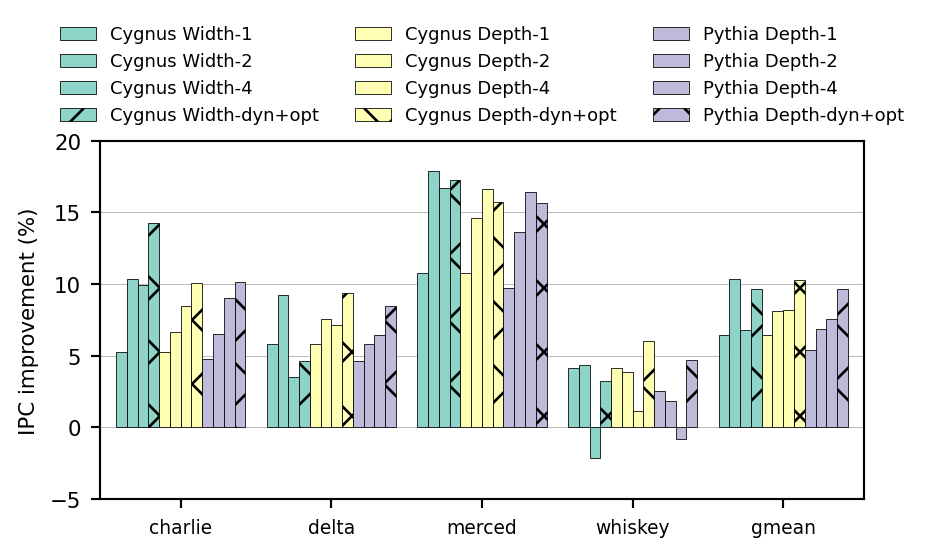

In [76]:
reload(plot)
plot.plot_benchmark_statistic(
    equal_prefetchers_df, "google", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=equal_prefetchers_colors,
    hatches=equal_prefetchers_hatches,
    legend_kwargs=equal_prefetchers_legend_kwargs,
    label_kwargs=equal_prefetchers_label_kwargs,
    add_suptitle=False,
    add_xlabel=False,
    ylabel='IPC improvement (%)',
    ylim=(-5, 20),
    ytick_distance=5,
    dpi=192, figsize=(5, 3))

### cloudsuite

In [30]:
reload(plot)
pd.set_option('display.max_rows', 500)
plot.get_benchmark_table(
    equal_prefetchers_df, "cloudsuite", "cpu.gmean.ipc_improvement",
    add_mean=True).T

,Cygnus Width-1,Cygnus Width-2,Cygnus Width-4,Cygnus Width-dyn+opt,Cygnus Depth-1,Cygnus Depth-2,Cygnus Depth-4,Cygnus Depth-dyn+opt,Pythia Depth-1,Pythia Depth-2,Pythia Depth-4,Pythia Depth-dyn+opt
cassandra,3.140000,3.630000,1.980000,2.930000,3.140000,3.180000,2.710000,3.960000,2.880000,2.990000,2.74000,4.000000
classifcation,-1.630000,-2.740000,-5.660000,-2.010000,-1.630000,-2.680000,-5.060000,-1.550000,-2.010000,-3.240000,-5.43000,-1.670000
cloud9,8.870000,13.740000,16.460000,15.300000,8.870000,12.260000,14.630000,10.220000,7.000000,10.220000,13.23000,8.060000
nutch,5.740000,7.850000,7.970000,8.380000,5.740000,6.560000,7.310000,7.190000,4.490000,6.340000,7.42000,6.640000
streaming,1.590000,2.470000,2.090000,2.360000,1.590000,1.820000,2.100000,2.330000,1.150000,1.370000,1.42000,1.800000
gmean,3.480295,4.845543,4.312125,5.226831,3.480295,4.109412,4.137042,4.351796,2.656729,3.435945,3.68899,3.707568


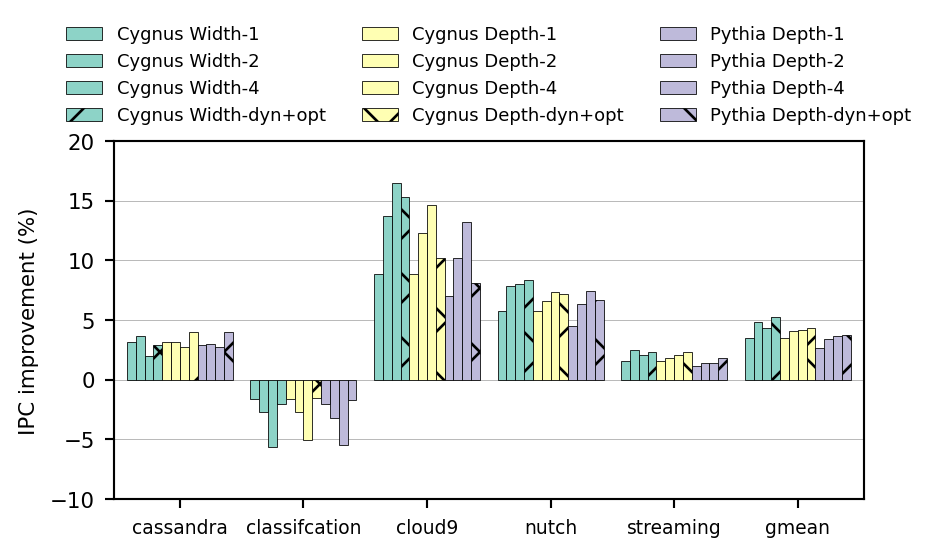

In [78]:
reload(plot)
plot.plot_benchmark_statistic(
    equal_prefetchers_df, "cloudsuite", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=equal_prefetchers_colors,
    hatches=equal_prefetchers_hatches,
    legend_kwargs=equal_prefetchers_legend_kwargs,
    label_kwargs=equal_prefetchers_label_kwargs,
    add_suptitle=False,
    add_xlabel=False,
    ylabel='IPC improvement (%)',
    ylim=(-10, 20),
    ytick_distance=5,
    dpi=192, figsize=(5, 3))

# Baseline prefetchers

In [49]:
baseline_prefetchers_df = {
    #'Baseline':     studies['baseline']['_baseline'],
    'Cygnus':       studies['prefetchers']['cygnus'],
    'Cygnus Depth': studies['prefetchers']['cygnus_depth'],
    'Pythia':       studies['prefetchers']['pythia'],
    #'Bingo':   studies['prefetchers']['bingo'],
    #'SMS':     studies['prefetchers']['sms'],
    #'SPP':     studies['prefetchers']['spp'],
    'SPP+PPF': studies['prefetchers']['spp_ppf'],
    #'MLOP':    studies['prefetchers']['mlop'],
    #'DSPatch': studies['prefetchers']['dspatch'],
    'my5':     studies['prefetchers']['my5'],
}
baseline_prefetchers_colors = {
    'Cygnus': colormaps['Set3'](0),
    'Cygnus Depth': colormaps['Set3'](1),
    'Pythia': colormaps['Set3'](2),
    'Bingo': colormaps['Set3'](3),
    'SMS': colormaps['Set3'](4),
    'SPP': colormaps['Set3'](5),
    'SPP+PPF': colormaps['Set3'](6),
    'MLOP': colormaps['Set3'](7),
    'DSPatch': colormaps['Set3'](8),
    'my5': colormaps['Set3'](9),
}
baseline_prefetchers_hatches = defaultdict(lambda: None, {})

baseline_prefetchers_legend_kwargs = {
    'ncol': 4,
    'fontsize': 6.75,
    'loc': 'lower center',
    'bbox_to_anchor': (0.5, 1.0),
    'framealpha': 0,
}

baseline_prefetchers_legend_kwargs_wide = {
    'ncol': 6,
    'fontsize': 6.75,
    'loc': 'lower center',
    'bbox_to_anchor': (0.5, 1.0),
    'framealpha': 0,
}

baseline_prefetchers_label_kwargs = {
    'rotation': 0,
    'ha': 'center',
    'fontsize': 7,
}

#baseline_prefetchers_df_plus_baseline = copy.deepcopy(prefetchers_df)
#baseline_prefetchers_df_plus_baseline['Baseline'] = studies['baseline']['_baseline']

## IPC improvement

In [50]:
reload(plot)
plot.get_suite_table(
    baseline_prefetchers_df, "cpu.gmean.ipc_improvement",
    suites=suites, add_mean=True)

,spec06,spec17,cloudsuite,gap,gap_real,gmean
Cygnus,20.94,16.40,5.23,27.12,NaN,NaN
Cygnus Depth,18.50,17.06,4.35,25.54,NaN,NaN
Pythia,20.44,17.33,3.71,25.20,NaN,NaN
SPP+PPF,23.19,18.46,3.98,24.41,NaN,NaN
my5,NaN,17.93,4.14,24.85,NaN,NaN


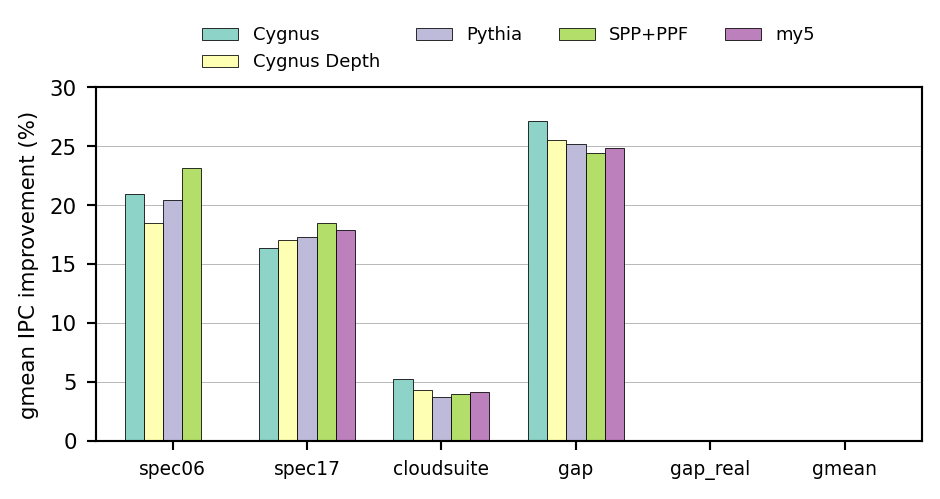

In [69]:
reload(plot)
plot.plot_suite_statistic(
    baseline_prefetchers_df, "cpu.gmean.ipc_improvement",
    suites=suites,
    add_mean=True,
    colors=baseline_prefetchers_colors,
    hatches=baseline_prefetchers_hatches,
    legend_kwargs=baseline_prefetchers_legend_kwargs,
    label_kwargs=baseline_prefetchers_label_kwargs,
    add_suptitle=False,
    add_xlabel=False,
    ylabel='gmean IPC improvement (%)',
    ylim=(0, 30),
    ytick_distance=5,
    dpi=192, figsize=(5, 2.7))

### spec06

In [65]:
reload(plot)
plot.get_benchmark_table(
    baseline_prefetchers_df, "spec06", "cpu.gmean.ipc_improvement",
    add_mean=True).T

,Cygnus,Cygnus Depth,Pythia,SPP+PPF,my5
GemsFDTD,46.910000,34.120000,52.690000,55.490000,55.58
astar,6.790000,6.650000,6.690000,7.910000,2.23
bwaves,18.010000,26.350000,24.680000,29.720000,20.89
cactusADM,80.750000,69.430000,79.590000,76.040000,49.58
gcc,20.130000,12.070000,10.730000,15.570000,16.80
lbm,17.990000,-6.310000,11.690000,14.620000,14.81
leslie3d,17.450000,3.000000,19.720000,20.610000,19.19
libquantum,50.660000,75.730000,44.400000,61.480000,66.52
mcf,8.450000,9.320000,9.780000,9.100000,24.84
milc,0.330000,5.510000,4.250000,8.070000,14.68


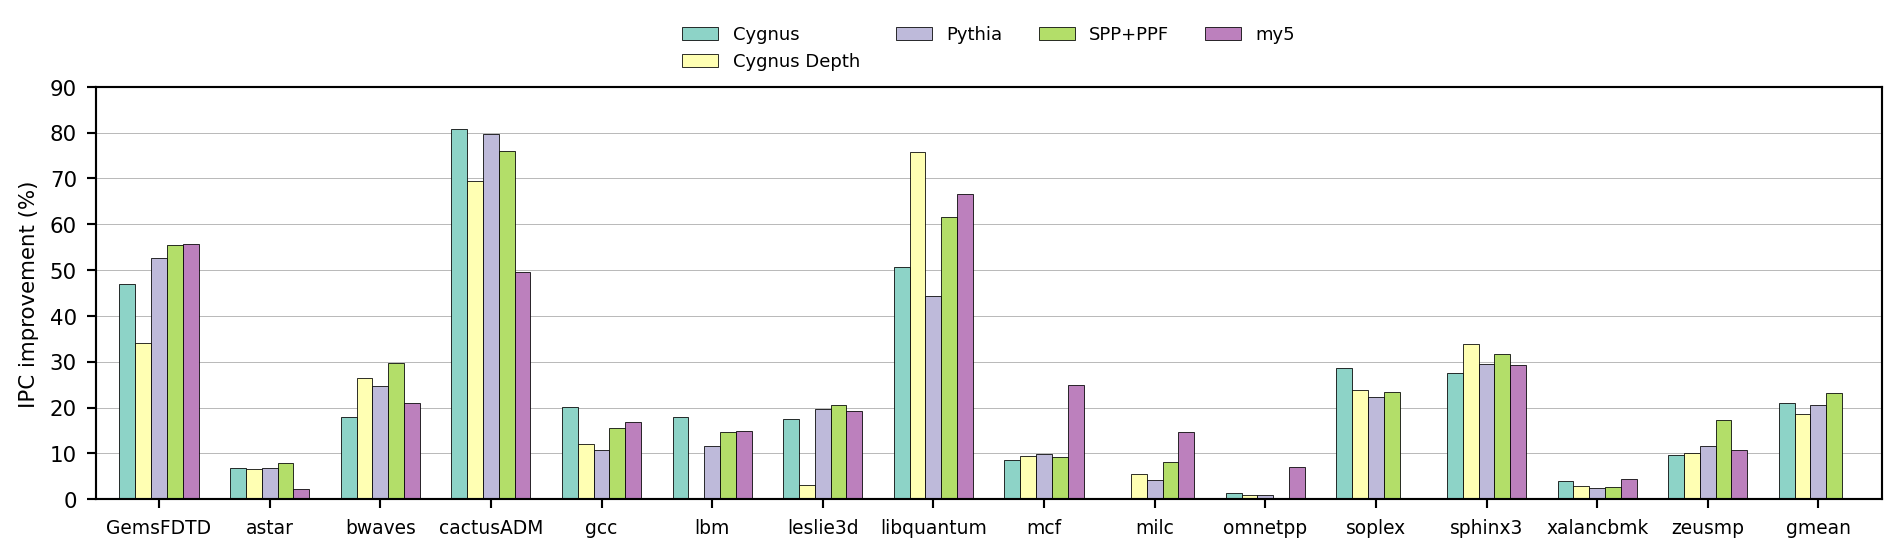

In [68]:
reload(plot)
plot.plot_benchmark_statistic(
    baseline_prefetchers_df, "spec06", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=baseline_prefetchers_colors,
    hatches=baseline_prefetchers_hatches,
    legend_kwargs=baseline_prefetchers_legend_kwargs,
    label_kwargs=baseline_prefetchers_label_kwargs,
    add_suptitle=False,
    add_xlabel=False,
    ylabel='IPC improvement (%)',
    ylim=(0, 90),
    ytick_distance=10,
    dpi=192, figsize=(10, 3))

### gap

In [54]:
reload(plot)
plot.get_benchmark_table(
    baseline_prefetchers_df, "gap", "cpu.gmean.ipc_improvement",
    add_mean=True).T

,Cygnus,Cygnus Depth,Pythia,SPP+PPF,my5
bc,11.990000,10.950000,11.430000,8.82000,11.0700
bfs,77.470000,59.140000,60.200000,61.86000,55.6100
cc,34.960000,36.260000,33.770000,32.53000,34.5000
pr,19.970000,23.430000,21.740000,23.05000,28.4900
sssp,5.990000,7.010000,7.180000,4.84000,1.9600
tc,23.760000,23.190000,23.600000,23.12000,24.3400
gmean,27.127016,25.540137,25.198218,24.40847,24.8469


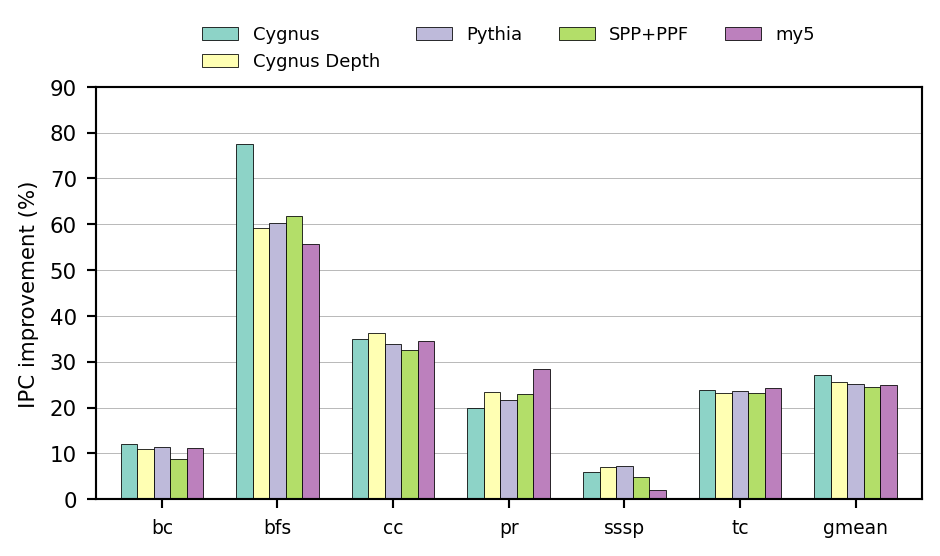

In [70]:
reload(plot)
plot.plot_benchmark_statistic(
    baseline_prefetchers_df, "gap", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=baseline_prefetchers_colors,
    hatches=baseline_prefetchers_hatches,
    legend_kwargs=baseline_prefetchers_legend_kwargs,
    label_kwargs=baseline_prefetchers_label_kwargs,
    add_suptitle=False,
    add_xlabel=False,
    ylabel='IPC improvement (%)',
    ylim=(0, 90),
    ytick_distance=10,
    dpi=192, figsize=(5, 3))

### gap_real

In [56]:
reload(plot)
pd.set_option('display.max_rows', 500)
plot.get_benchmark_table(
    baseline_prefetchers_df, "gap_real", "cpu.gmean.ipc_improvement",
    add_mean=True).T

,Cygnus,Cygnus Depth,Pythia,SPP+PPF,my5
bc__amazon-2008.mtx,4.46,4.63,4.60,4.30,1.91
bc__amazon0601.mtx,1.94,1.87,2.10,1.35,1.55
bc__belgium_osm.mtx,6.48,6.01,5.94,4.76,2.29
bc__coAuthorsCiteseer.mtx,3.99,5.39,5.39,4.62,2.30
bc__coPapersCiteseer.mtx,9.31,9.77,9.33,9.53,8.43
bc__com-Youtube.mtx,4.55,5.62,5.81,4.74,2.43
bc__dblp-2010.mtx,NaN,9.87,9.78,9.42,4.22
bc__luxembourg_osm.mtx,14.92,15.34,15.95,18.01,6.16
bc__netherlands_osm.mtx,7.37,5.97,6.64,5.32,2.15
bc__soc-LiveJournal1.mtx,-0.09,NaN,0.47,0.37,0.44


### google

In [57]:
reload(plot)
plot.get_benchmark_table(
    baseline_prefetchers_df, "google", "cpu.gmean.ipc_improvement",
    add_mean=True).T

,Cygnus,Cygnus Depth,Pythia,SPP+PPF,my5
charlie,14.240000,10.110000,10.170000,10.370000,6.390000
delta,4.630000,9.410000,8.480000,7.960000,2.150000
merced,17.240000,15.720000,15.690000,15.260000,2.400000
whiskey,3.270000,6.030000,4.700000,4.460000,2.930000
gmean,9.680924,10.263111,9.689203,9.442408,3.453521


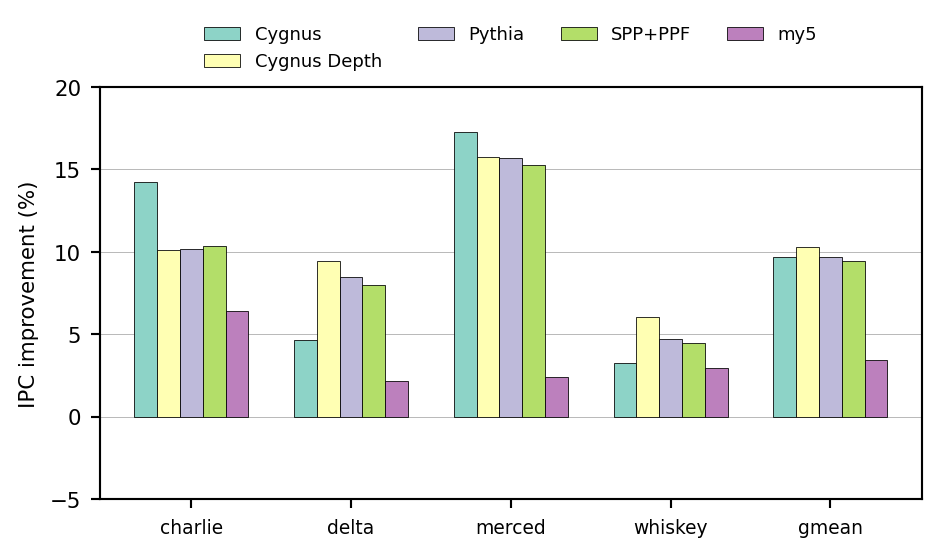

In [77]:
reload(plot)
plot.plot_benchmark_statistic(
    baseline_prefetchers_df, "google", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=baseline_prefetchers_colors,
    hatches=baseline_prefetchers_hatches,
    legend_kwargs=baseline_prefetchers_legend_kwargs,
    label_kwargs=baseline_prefetchers_label_kwargs,
    add_suptitle=False,
    add_xlabel=False,
    ylabel='IPC improvement (%)',
    ylim=(-5, 20),
    ytick_distance=5,
    dpi=192, figsize=(5, 3))

### cloudsuite

In [ ]:
reload(plot)
plot.get_benchmark_table(
    baseline_prefetchers_df, "cloudsuite", "cpu.gmean.ipc_improvement",
    add_mean=True).T

,Cygnus,Cygnus Depth,Pythia,SPP+PPF,my5
cassandra,2.930000,3.960000,4.000000,3.390000,4.500000
classifcation,-2.010000,-1.550000,-1.670000,-1.290000,0.670000
cloud9,15.300000,10.220000,8.060000,8.410000,6.860000
nutch,8.380000,7.190000,6.640000,6.950000,6.680000
streaming,2.360000,2.330000,1.800000,2.740000,2.120000
gmean,5.226831,4.351796,3.707568,3.983846,4.137001


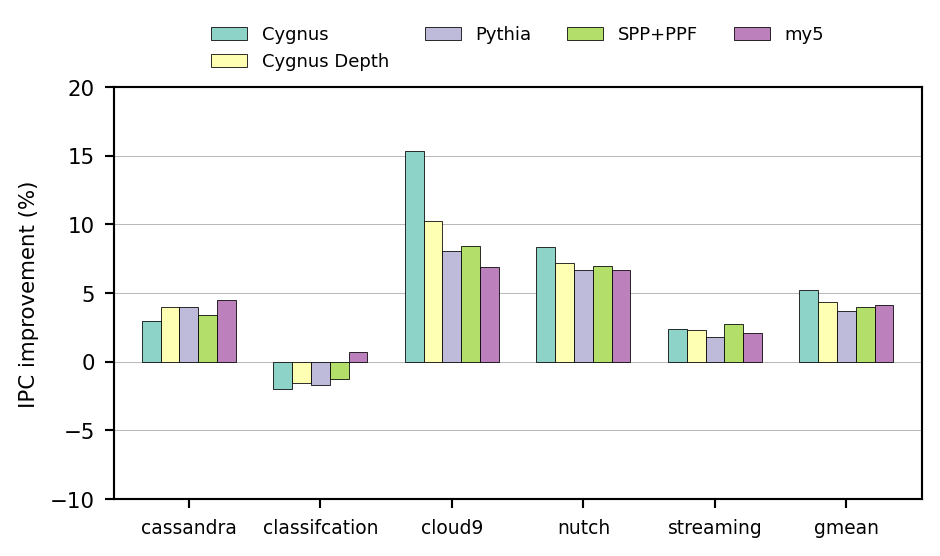

In [79]:
reload(plot)
plot.plot_benchmark_statistic(
    baseline_prefetchers_df, "cloudsuite", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=baseline_prefetchers_colors,
    hatches=baseline_prefetchers_hatches,
    legend_kwargs=baseline_prefetchers_legend_kwargs,
    label_kwargs=baseline_prefetchers_label_kwargs,
    add_suptitle=False,
    add_xlabel=False,
    ylabel='IPC improvement (%)',
    ylim=(-10, 20),
    ytick_distance=5,
    dpi=192, figsize=(5, 3))